<a href="https://colab.research.google.com/github/Joan-Njoki-Mwangi/Blinkit-Grocery-Store-Deep-Dive/blob/main/Blinkit_Grocery_Store_Deep_Dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Blinkit Analysis Overview**

This project explores the Blinkit Grocery dataset, which is made up of five interconnected datasets:

* Stock levels – daily product availability across markets

* Sales – order details including quantities, prices, and discounts

* Delivery times – promised vs. actual delivery performance

* Markets – thriving and potential markets with their characteristics

* Customers – retention, churn, and purchasing behavior

 **Objectives**

* Analyze market performance — identify thriving vs potential markets.

* Examine operational efficiency — stockouts, delivery delays, and order fulfillment.

* Explore sales trends — revenue, demand patterns, and seasonality.

* Investigate customer churn — find leading drivers and predict churn risk.

**Tools & Workflow**


 Tools and Technologies: Python for advanced analysis and modeling, and Tableau for visualization


### *Importing libraries*

In [60]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.dates as mdates


### 1.Customer segmentation & behavior

In [4]:
# uploading the datasource
customer_seg = pd.read_csv("/content/drive/MyDrive/Blinkit datastores/blinkit_customers.csv")

## *Data Exploration*

In [5]:
# previewing five random rows
customer_seg.sample(5)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
2302,94529626,Gavin Kaur,ldubey@example.net,910040657734,"61/527, Sampath Street\nPurnia-039153",Pudukkottai,762221,2023-12-06,New,17,1907.16
1550,56195475,Falguni Date,sharmaaradhana@example.com,913326874282,"94\nVenkataraman Ganj, Patiala-174200",Ahmedabad,31357,2024-06-25,Regular,18,1149.91
25,13461704,Zayan Ratta,shivansh35@example.com,914996250775,"33/78\nJoshi Path, Ludhiana-975587",Nanded,770516,2024-04-04,Premium,4,1024.45
2263,64151769,Teerth Mallick,dalbir88@example.com,916334916175,"H.No. 81, Pathak Marg, Purnia-445538",Mysore,33453,2024-05-02,New,14,1311.86
424,72946405,Ria Kuruvilla,oscar26@example.net,913574244187,"H.No. 434\nPradhan Zila, Gorakhpur 540230",Kulti,547077,2024-02-07,Premium,6,1287.78


In [6]:
customer_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB


In [7]:
#converting registration_date into datetime format
customer_seg['registration_date'] = pd.to_datetime(customer_seg['registration_date'])


-The dataset contains no null values, the columns in the correct data types, and the column names clearly defined.

## *Key insights*

In [8]:
# descriptive statistics
customer_seg.describe()

,customer_id,phone,pincode,registration_date,total_orders,avg_order_value
count,2.500000e+03,2.500000e+03,2500.000000,2500,2500.000000,2500.000000
mean,4.989961e+07,9.150532e+11,497653.183200,2024-01-15 18:06:20.160000,10.491600,1102.375836
min,3.181300e+04,9.100132e+11,666.000000,2023-03-16 00:00:00,1.000000,200.430000
25%,2.402443e+07,9.125946e+11,257079.750000,2023-08-21 18:00:00,6.000000,631.817500
50%,5.000044e+07,9.150236e+11,498662.000000,2024-01-22 12:00:00,10.000000,1118.650000
75%,7.595459e+07,9.176256e+11,740668.000000,2024-06-12 06:00:00,16.000000,1565.400000
max,9.989390e+07,9.199988e+11,999631.000000,2024-11-04 00:00:00,20.000000,1999.830000
std,2.919266e+07,2.882835e+09,281167.293249,NaN,5.805533,523.043183


### *Registrations*

In [9]:
customer_seg.registration_date=customer_seg['registration_date'].dt.to_period('D')

In [10]:
date_counts = customer_seg['registration_date'].value_counts()

# Identify the most occurring date and its frequency

most_occurring_date = date_counts.idxmax()
frequency = date_counts.max()

for date, count in date_counts.items():
    if count == frequency:
        print(f"The peak registration date was {date}, with a total of {count} registrations.")



The peak registration date was 2024-04-22, with a total of 10 registrations.
The peak registration date was 2024-06-23, with a total of 10 registrations.
The peak registration date was 2024-03-10, with a total of 10 registrations.
The peak registration date was 2024-10-03, with a total of 10 registrations.
The peak registration date was 2024-03-18, with a total of 10 registrations.


> Registrations cover the period from March 16, 2023, to November 4, 2024, with the majority occurring in 2024. Notably, March 10, March 18, April 22, June 23, and October 10 each recorded 10 registrations.

> The highest total number of orders per customer recorded is 20, while the majority of customers placed around 10 orders, with a variation of approximately ±5.8 standard deviations from the mean(approximately 10 orders). Notably, all registered customers placed at least one order.

> The average order value stands at 1,118.65, with a dispersion of about ± 523.04 around the mean, providing key insight into customer spending behavior

### *Area*

In [11]:
# creating a column of the highest spend using the average order value and total orders done
customer_seg['total_spent'] = customer_seg.total_orders * customer_seg.avg_order_value


In [12]:
# based on area
#area with the highest orders, could mean that it has the highest reach in terms of market penetration
# area with the highest order value

High_spending_areas = (
    customer_seg.groupby('area').agg(
        total_orders = ('total_orders','sum'),
        total_sales = ('total_spent','sum'),
        avg_spend = ('avg_order_value','mean'),
        num_customers = ('customer_id','nunique')
    ).sort_values(by='total_sales',ascending = False).head(10))

Least_spending_areas = (
    customer_seg.groupby('area').agg(
        total_orders = ('total_orders','sum'),
        total_sales = ('total_spent','sum'),
         avg_spend = ('avg_order_value','mean'),
        num_customers = ('customer_id','nunique')
    ).sort_values(by='total_sales',ascending = True).head(10))

print("Top 10 High Spending Areas:\n", High_spending_areas, "\n")
print("Bottom 10  Spending Areas:\n", Least_spending_areas)


Top 10 High Spending Areas:
              total_orders  total_sales    avg_spend  num_customers
area                                                              
Deoghar               200    232826.09  1139.368235             17
Orai                  190    229979.58  1116.716471             17
Chittoor              163    216974.06  1182.904615             13
Korba                 160    207739.78  1147.996923             13
Jalna                 175    203583.78  1273.023889             18
Burhanpur             159    201574.71  1289.944167             12
Bathinda              168    198542.49  1136.222941             17
Nandyal               162    188903.73  1167.437857             14
Bhagalpur             145    188006.04  1277.073636             11
Bulandshahr           150    180392.90  1269.042308             13 

Bottom 10  Spending Areas:
                 total_orders  total_sales    avg_spend  num_customers
area                                                               

**Insights from Area-Wise Spending (2023–2024)**

**High Performing Areas**

Deoghar recorded the highest total spend at 232,826, making it a stronghold in terms of revenue contribution.

Jalna stands out with the highest customer base (18 unique customers), each spending an average of 1,273.

> This suggests that Jalna offers both depth (volume of customers) and quality (above-average spend).

> It may be a strategic market for expansion/penetration given its strong customer engagement and spending levels above the 50th percentile of price dispersion.

**Emerging/Undervalued Areas**

Nashik, though listed among the bottom-10 areas by total sales, shows a notable average spend of 1,154 across just 4 customers.

This indicates that while the market is small in size, the existing customer base is relatively high-value.

> With proper outreach, customer acquisition in Nashik could unlock untapped revenue potential.

**Low Performing Areas (High Risk/Low Value)**

Areas like Mangalore, Muzaffarpur, and Srikakulam show very low average spend per customer (330–667) combined with small customer bases (1–4 customers).

> These locations may not currently justify aggressive investment, unless future campaigns indicate a potentially higher demand.

Strategic Takeaways

Deoghar = Revenue powerhouse (retain & strengthen).

Jalna = High-penetration, high-value — good for targeted promotions/loyalty programs.

Nashik = Small but promising — opportunity for customer acquisition.

Mangalore, Muzaffarpur, Srikakulam = Low ROI zones; require cost-benefit analysis before further investment.



### *Trends* over time:
*   Customer base; number of customers and registrations
*   Avg order value
*   Total orders
*   Total spending



In [40]:
customer_seg['Month'] = customer_seg['registration_date'].dt.to_timestamp().dt.to_period('M')
df = customer_seg[(customer_seg.Month > "2023-03") & (customer_seg.Month < "2024-11")]


In [41]:
# creating the table to show trends over time
customer_base = df.groupby('Month').agg(
    num_customers = ('customer_id','nunique'),
    avg_order_value = ('avg_order_value','mean'),
    volume_of_orders = ('total_orders','sum'),
    total_spending = ('total_spent','sum'),
    avg_num_orders = ('total_orders','mean'),
    count_date = ('registration_date','nunique')
).sort_values(by='Month')
customer_base

,num_customers,avg_order_value,volume_of_orders,total_spending,avg_num_orders,count_date
Month,,,,,,
2023-04,120,1115.539667,1212,1351797.21,10.100000,30
2023-05,108,1148.729907,1068,1248722.07,9.888889,30
2023-06,110,1040.531909,1094,1081048.25,9.945455,29
2023-07,114,1167.766316,1334,1557676.33,11.701754,29
2023-08,142,1072.427676,1427,1539585.96,10.049296,31
2023-09,115,1066.398957,1205,1316347.90,10.478261,30
2023-10,127,1045.316299,1473,1555834.29,11.598425,30
2023-11,144,1117.789514,1544,1706105.01,10.722222,30
2023-12,109,1121.523211,1215,1405702.83,11.146789,31


*Having established a baseline with key data points, including average spend, total sales generated, order volumes (both average and total), and the number of customers — the analysis will explore the following:*

**Sales vs. Volume Trends**: How have total sales trended against order volumes over time? Do the patterns suggest seasonality or are they driven by one-time purchases?

**Customer Growth and Segmentation**: Has the number of registered customers grown over time? What are the distinct trends across different segments (premium, new, inactive)?

**Average Order Value vs. Customer Acquisition**: How does the average order value relate to the number of registered customers? Does lower pricing correlate with more customer registrations?

**Price Elasticity**: Does price elasticity hold true in this dataset? Specifically, does lower pricing correspond with a higher volume of orders?

### i) Sales vs Voume Trends

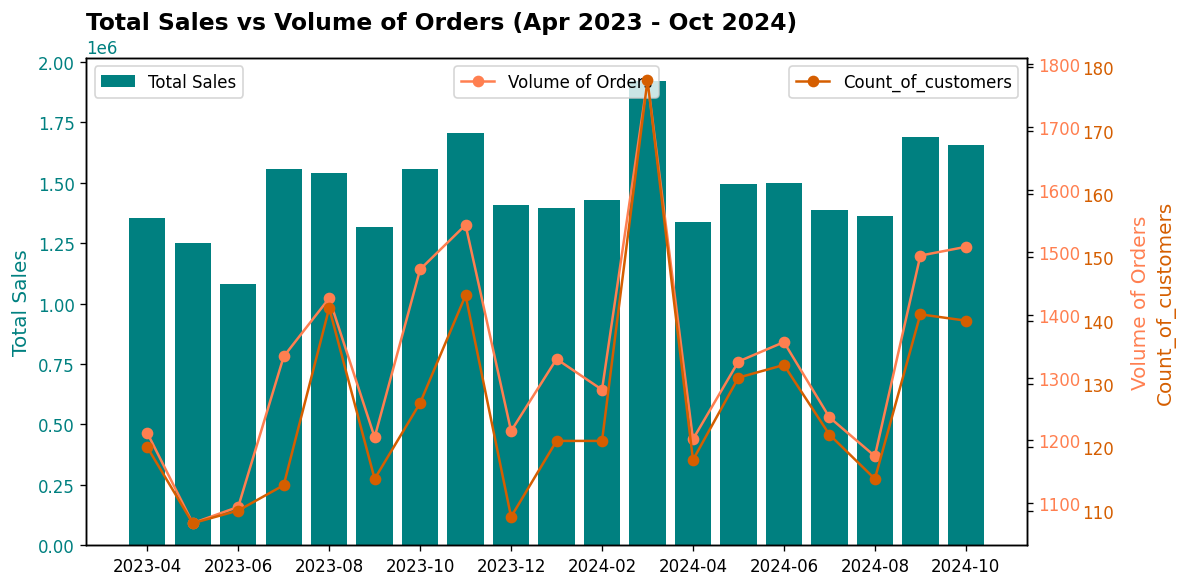

In [42]:

# Exclude March 2023 and Nov 2024
cust_base_excl = customer_base.copy()
# Create figure and axis
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 120  # sharper text

fig, ax1 = plt.subplots()

# Bars for spending
ax1.bar(cust_base_excl.index.astype(str), cust_base_excl["total_spending"],
        color="teal", label="Total Sales")

ax1.set_ylabel("Total Sales", color="teal", fontsize=12)
ax1.tick_params(axis="y", labelcolor="teal")

# Secondary axis with line
ax2 = ax1.twinx()
ax2.plot(cust_base_excl.index.astype(str), cust_base_excl["volume_of_orders"],
         color="coral", marker="o", label="Volume of Orders")

ax2.set_ylabel("Volume of Orders", color="coral", fontsize=12, labelpad = 30)
ax2.tick_params(axis="y", labelcolor="coral")

# Secondary axis with line
ax3 = ax1.twinx()
ax3.plot(cust_base_excl.index.astype(str), cust_base_excl["num_customers"],
         color="#D55E00", marker="o", label="Count_of_customers")

ax3.set_ylabel("Count_of_customers", color="#D55E00", fontsize=12, labelpad=25)
ax3.tick_params(axis="y", labelcolor="#D55E00",pad = 30)


# Fix xticks
plt.xticks(rotation=45, ha="right")
ax1.set_xticks(range(0, len(cust_base_excl.index), 2))  # show every 2nd month

plt.title("Total Sales vs Volume of Orders (Apr 2023 - Oct 2024)", fontsize=14,fontweight = 'bold',loc = 'left')
ax1.legend(loc="upper left")
ax2.legend(loc="upper center")
ax3.legend(loc="upper right")
plt.tight_layout()
plt.show()

* At a glance, a comparison of the yearly trends for 2023 and 2024 shows that **March 2024 recorded the highest sales**, with 2024 exceeding 125,000 showing a better performance than 2023.

* The data also suggests a clear correlation between the number of customers and the volume of orders—more customers generally drive higher order volumes, which in turn lead to greater sales.

* However, certain months **deviate** from this pattern. For example, **June
2023, December 2023, and August 2024** show relatively fewer customers placing orders, yet sales remained comparatively high. This indicates that factors beyond customer count—such as order size or product mix—likely influenced sales performance.

> Looking ahead, combining this dataset with marketing campaign data and customer feedback could provide valuable insights into what specifically drove the spike in March 2024 sales, especially since it is not traditionally a holiday season.









### ii) **Customer Growth and Segmentation**,
 On to the second question on, has the number of registered customers grown over time? What are the distinct trends across different segments (premium, new, inactive)?

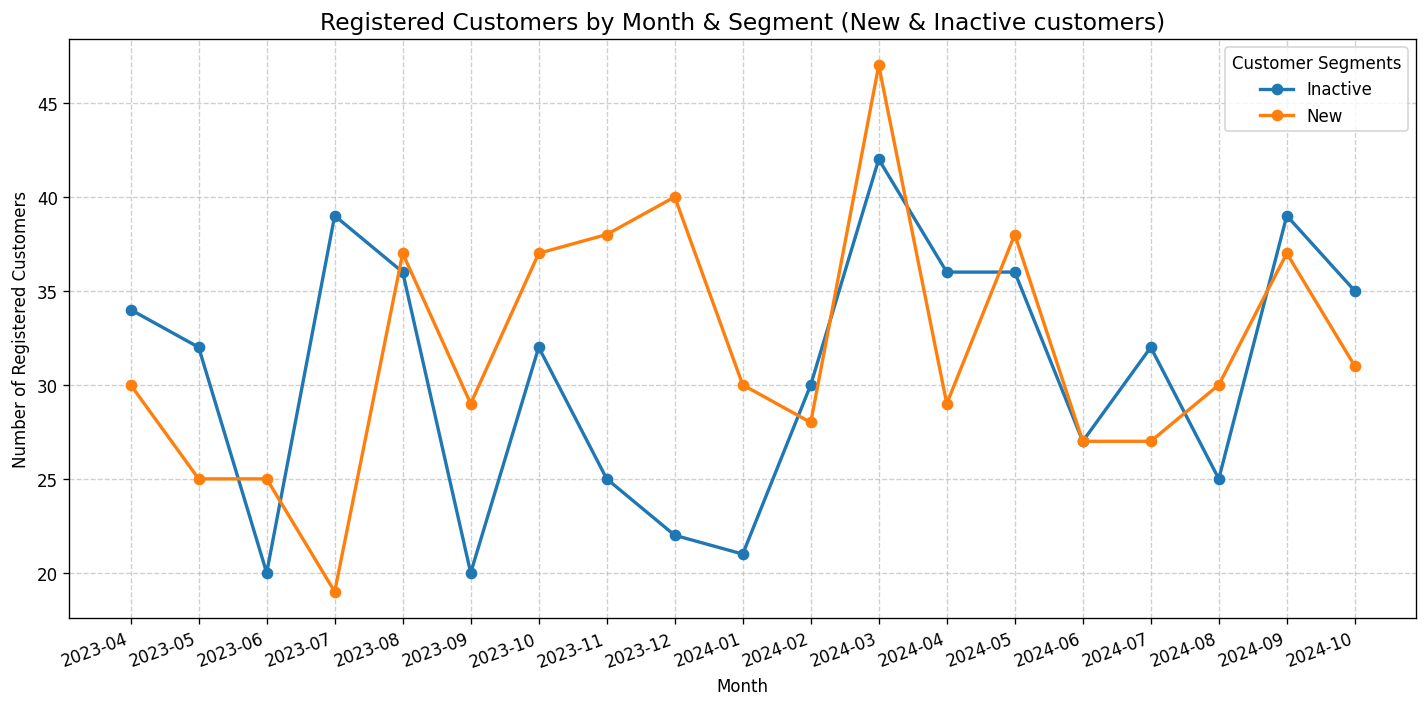

In [84]:
# grouping number of registered customers by Month & customer segments

customer_segments = df.groupby(['Month','customer_segment'])['customer_id'].nunique().reset_index()
customer_segments.rename(columns={'customer_id':'number_of_registered_customers'},inplace=True)
filtered_df1 = customer_segments[customer_segments['customer_segment'].isin(['Inactive','New'])]


plt.figure(figsize=(12,6))

for segment in filtered_df1['customer_segment'].unique():
    subset = filtered_df1[filtered_df1['customer_segment'] == segment]
    plt.plot(
        subset['Month'].astype(str),
        subset['number_of_registered_customers'],
        marker='o',
        linewidth=2,
        label=segment
    )

plt.title("Registered Customers by Month & Segment (New & Inactive customers)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Registered Customers")
plt.legend(title="Customer Segments")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()



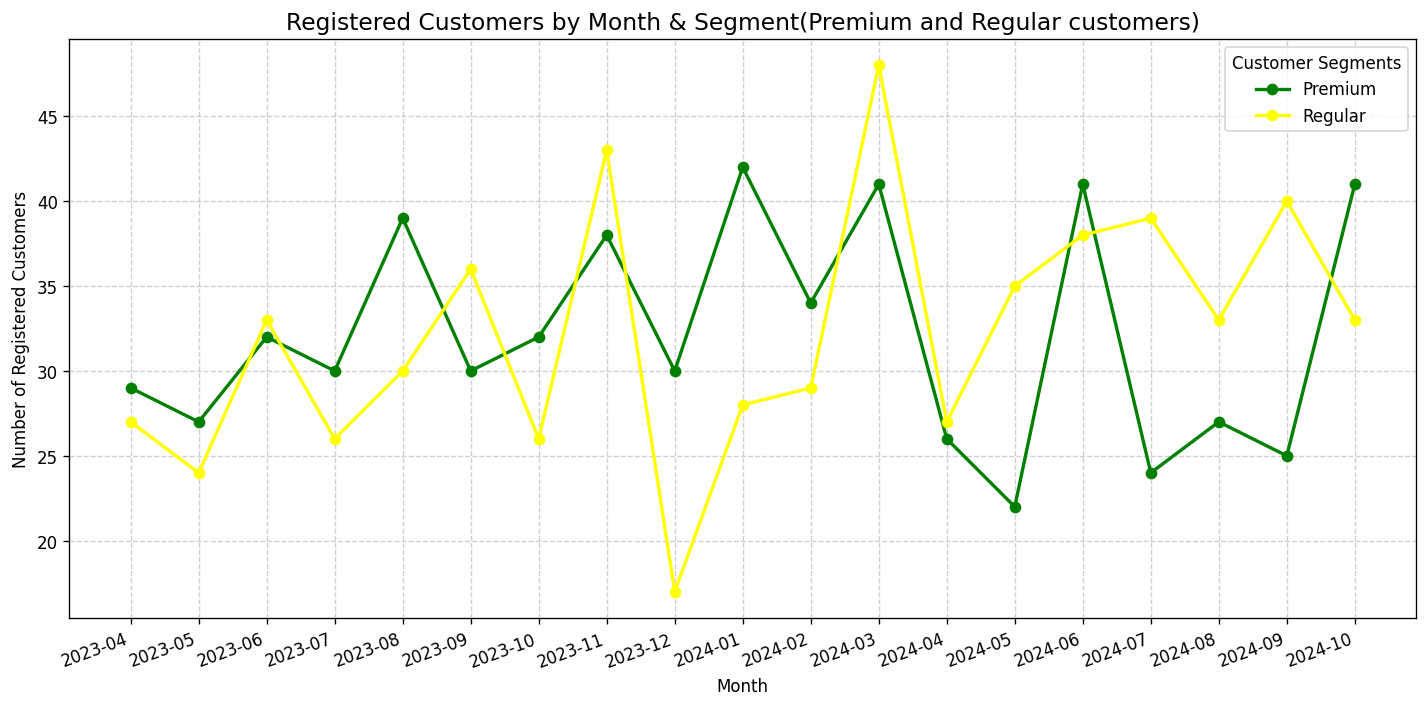

In [89]:

filtered_df2 = customer_segments[customer_segments['customer_segment'].isin(['Premium','Regular'])]

# defining colors for the segments
colors = {'Premium':'green',
         'Regular':'yellow'}

plt.figure(figsize=(12,6))

for segment in filtered_df2['customer_segment'].unique():
    subset = filtered_df2[filtered_df2['customer_segment'] == segment]
    plt.plot(
        subset['Month'].astype(str),
        subset['number_of_registered_customers'],
        marker='o',
        linewidth=2,
        label=segment,
        color = colors[segment]
    )

plt.title("Registered Customers by Month & Segment(Premium and Regular customers)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Registered Customers")
plt.legend(title="Customer Segments")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()



### iv) Price elasticity:
* Does low pricing leads to high orders, or the opposite that the high pricing leads to high orders

                            OLS Regression Results                            
Dep. Variable:             log_orders   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3387
Date:                Thu, 21 Aug 2025   Prob (F-statistic):              0.561
Time:                        14:06:57   Log-Likelihood:                -3021.4
No. Observations:                2500   AIC:                             6047.
Df Residuals:                    2498   BIC:                             6059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9987      0.189     10.601      0.0

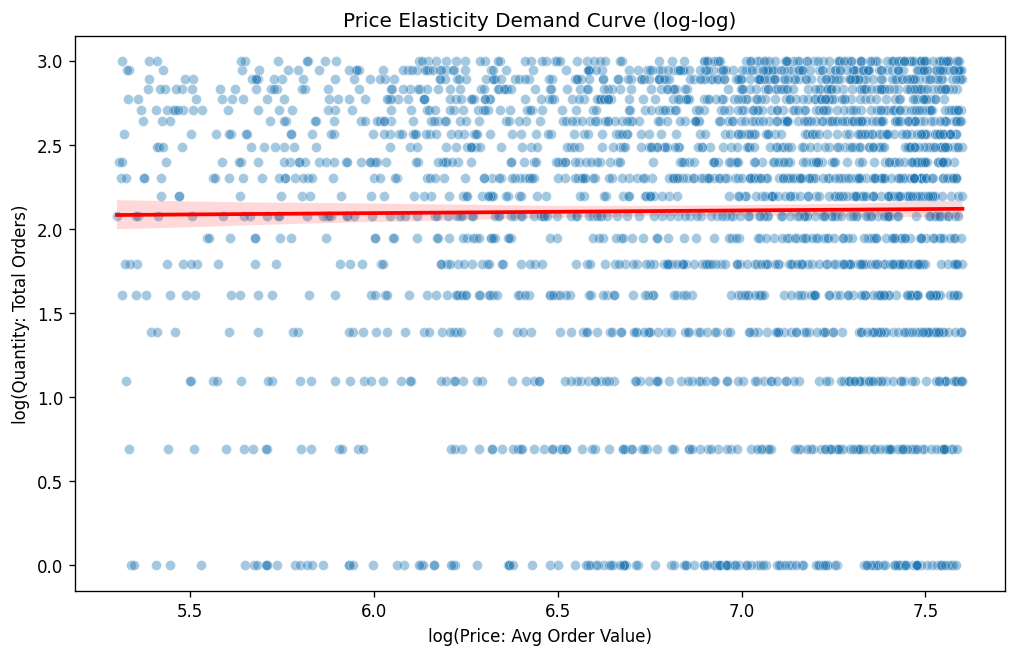

In [22]:
#what's the relationship between the order value and number of customers over time, has low order value led to the influx of customers
# creating a dataset with average pricing and average number of orders
import statsmodels.api as sm
pricing_volume = customer_seg[['avg_order_value','total_orders']]

# Take logs of both variables (drop rows with 0 or negative values if any)
pricing_volume = pricing_volume[(pricing_volume['total_orders'] > 0) &
                                (pricing_volume['avg_order_value'] > 0)]
pricing_volume['log_orders'] = np.log(pricing_volume['total_orders'])
pricing_volume['log_price'] = np.log(pricing_volume['avg_order_value'])

# Run regression: log(Q) ~ log(P)
X = sm.add_constant(pricing_volume['log_price'])
y = pricing_volume['log_orders']
model = sm.OLS(y, X).fit()

# Print summary (elasticity coefficient will be 'log_price')
print(model.summary())

# Get elasticity coefficient
elasticity = model.params['log_price']
print(f"\nEstimated Price Elasticity of Demand: {elasticity:.3f}")

# --- Plotting ---
plt.figure(figsize=(10,6))

# Scatter of log-log data
sns.scatterplot(x=pricing_volume['log_price'], y=pricing_volume['log_orders'], alpha=0.4)

# Regression line
sns.regplot(x='log_price', y='log_orders', data=pricing_volume, scatter=False, color='red')

# Labels
plt.xlabel("log(Price: Avg Order Value)")
plt.ylabel("log(Quantity: Total Orders)")
plt.title("Price Elasticity Demand Curve (log-log)")

plt.show()

While average order value may not be the most accurate measure for assessing the relationship between pricing and order volume, the **estimated Price Elasticity of Demand (PED) is 0.016**. This indicates a slight positive association between price and order volume, which could suggest the presence of premium customers who equate higher prices with better quality, or the influence of promotional offers that drive higher sales volumes.